In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"Coffee Shop Sales.xlsx") 
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.shape

(149116, 11)

The data set has 149116 rows and 11 columns

In [4]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

The data set contain no null values

In [7]:
#changing the datatype of the transaction time to timedelta for it to be easier to combine with the transaction time column
df['transaction_time'] = df['transaction_time'].astype(str) 
df['transaction_time'] = pd.to_timedelta(df['transaction_time']) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


The data type for the transaction time has change to timedelta64

In [9]:
# creating a datetime column that contain both the trasaction time and the transaction date 
df['date_time'] = df['transaction_date'] + df['transaction_time']

In [10]:
# coming up with a sales column (unit price * transaction qty) 
df['Sales'] = df['transaction_qty'] * df['unit_price']

In [11]:
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,date_time,Sales
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,6.0
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,6.2
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,9.0


In [12]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,date_time,Sales
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,2023-04-16 00:04:47.989404160,4.686367
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,2023-01-01 07:06:11,0.800000
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,2023-03-06 13:37:08,3.000000
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,2023-04-24 08:24:32.500000,3.750000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,2023-05-30 07:16:13,6.000000
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,2023-06-30 20:57:19,360.000000
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,NaN,4.227099


* The average transaction quantity is 1.44
* The average unit price is 3. ranging from 0.8 to 45
* the average sales is 4.69 indicating that the transacions mainly involve small purchases
* The transaction time spans from 6 o'clock to 8:59

In [13]:
# group the data by location and add up all the sales while counting the transaction_id
df_location = df.groupby('store_location').agg({
    'Sales' : 'sum',
    'transaction_id' : 'count' 
})
df_location

,Sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


* From the data above, it can be seen that Hell's Kitchen has high sales, followed by Astoria, then the Lower Manhattan has the lowest sales

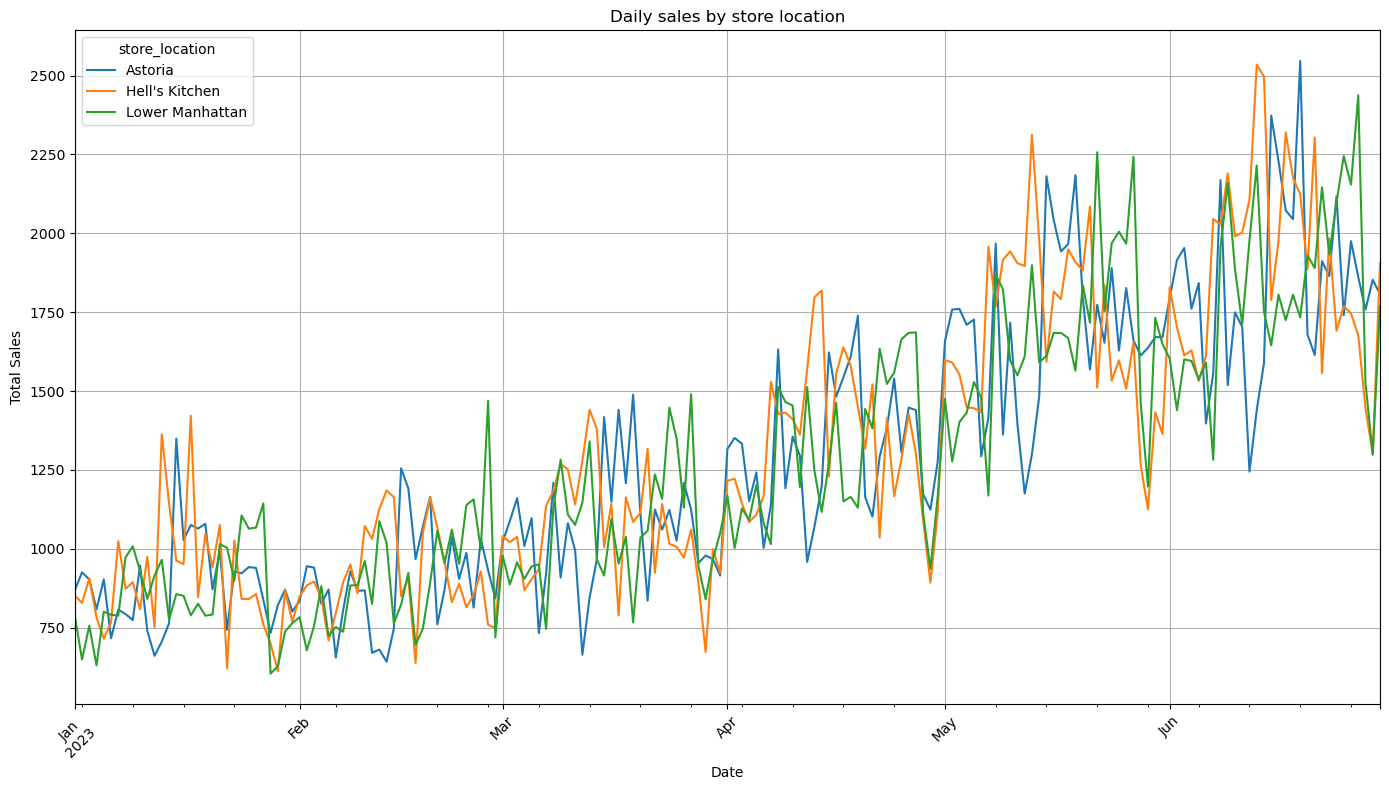

In [14]:
# visualizing
# sales by location and by date 
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['Sales'].sum().unstack() 
daily_sales_by_location.plot(figsize=(14,8), title = 'Daily sales by store location')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* For all of the  location it can be seen that the total sales increased form the month of january 2023 to july 2023

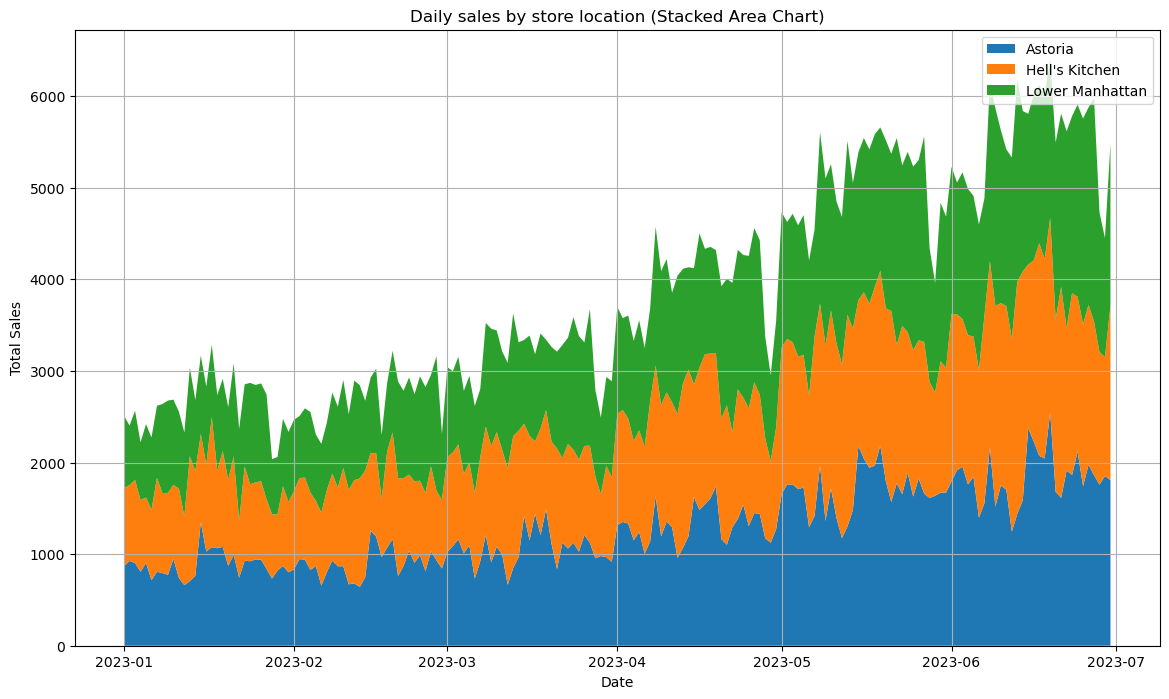

In [15]:
# area chart
plt.figure(figsize=(14,8))
plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels= daily_sales_by_location.columns)
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily sales by store location (Stacked Area Chart)')
plt.show()

In [16]:
# sales trend over time (daily, weekly, and monthly) 
daily_sales = df.groupby('transaction_date')['Sales'].sum().reset_index() 
daily_sales

,transaction_date,Sales
0,2023-01-01,2508.20
1,2023-01-02,2403.35
2,2023-01-03,2565.00
3,2023-01-04,2220.10
4,2023-01-05,2418.85
...,...,...
176,2023-06-26,5875.90
177,2023-06-27,5975.65
178,2023-06-28,4728.90
179,2023-06-29,4450.75


In [17]:
# come up with a new column (day of the week)
df['day_of_the_week'] = df['date_time'].dt.day_name() 

# create another variable that is the original df grouped by the day of the week column then summing all of its sales
weekly_sales = df.groupby('day_of_the_week')['Sales'].sum().reindex(
    ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index() # reindex shows how i want the order of days. From monday to sunday
weekly_sales

,day_of_the_week,Sales
0,Monday,101677.28
1,Tuesday,99455.94
2,Wednesday,100313.54
3,Thursday,100767.78
4,Friday,101373.00
5,Saturday,96894.48
6,Sunday,98330.31


* Monday has the highest  number of sales and Sunday has the lowest number of sales

In [18]:
# come up with a new column (month)
df['month'] = df['date_time'].dt.to_period('M')
monthly_sales = df.groupby('month')['Sales'].sum().reset_index() 
monthly_sales

,month,Sales
0,2023-01,81677.74
1,2023-02,76145.19
2,2023-03,98834.68
3,2023-04,118941.08
4,2023-05,156727.76
5,2023-06,166485.88


 * Trend of sales has increased form januany to july

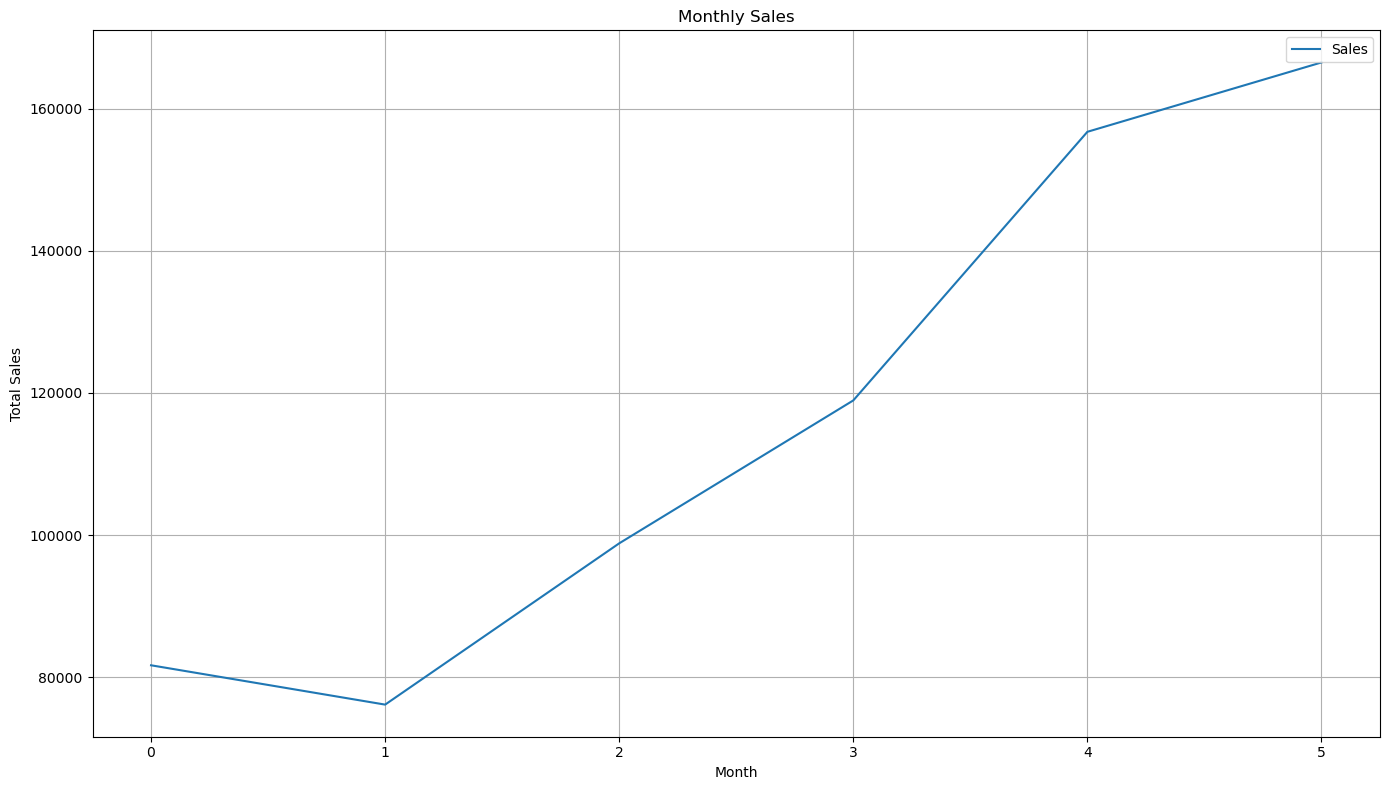

In [19]:
# visualizing the trend of sales by month 
monthly_sales.plot(figsize=(14,8), title = 'Monthly Sales') 

plt.xlabel('Month') 
plt.ylabel('Total Sales')
plt.grid(True) 
plt.tight_layout() 
plt.show()

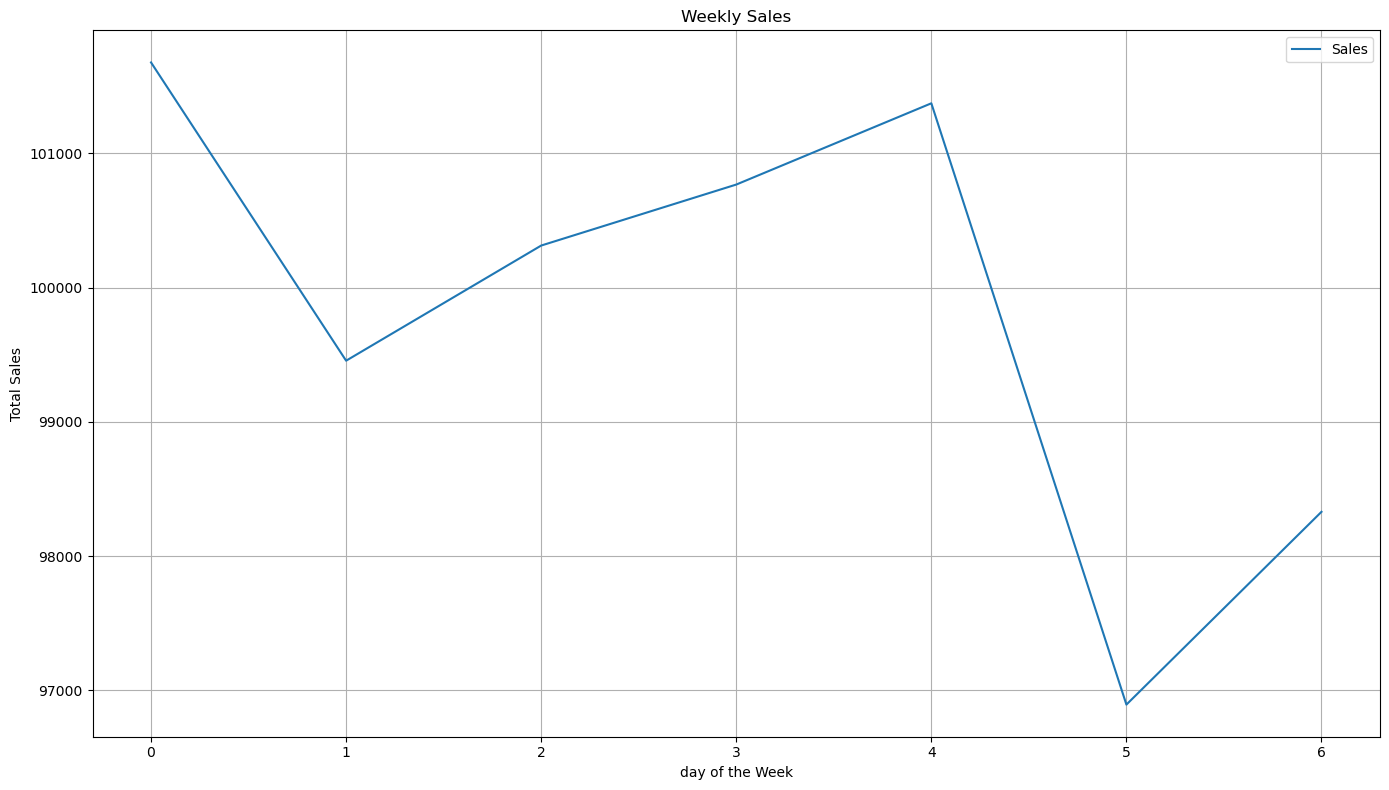

In [20]:
# visualizing the trend of sales by week
weekly_sales.plot(figsize=(14,8), title = 'Weekly Sales') 

plt.xlabel('day of the Week') 
plt.ylabel('Total Sales')
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [21]:
# sales by location on different days of the week (bar) 
sales_by_day = df.groupby(['day_of_the_week', 'store_location'])['Sales'].sum().unstack() 

days_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order) 
sales_by_day

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_the_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


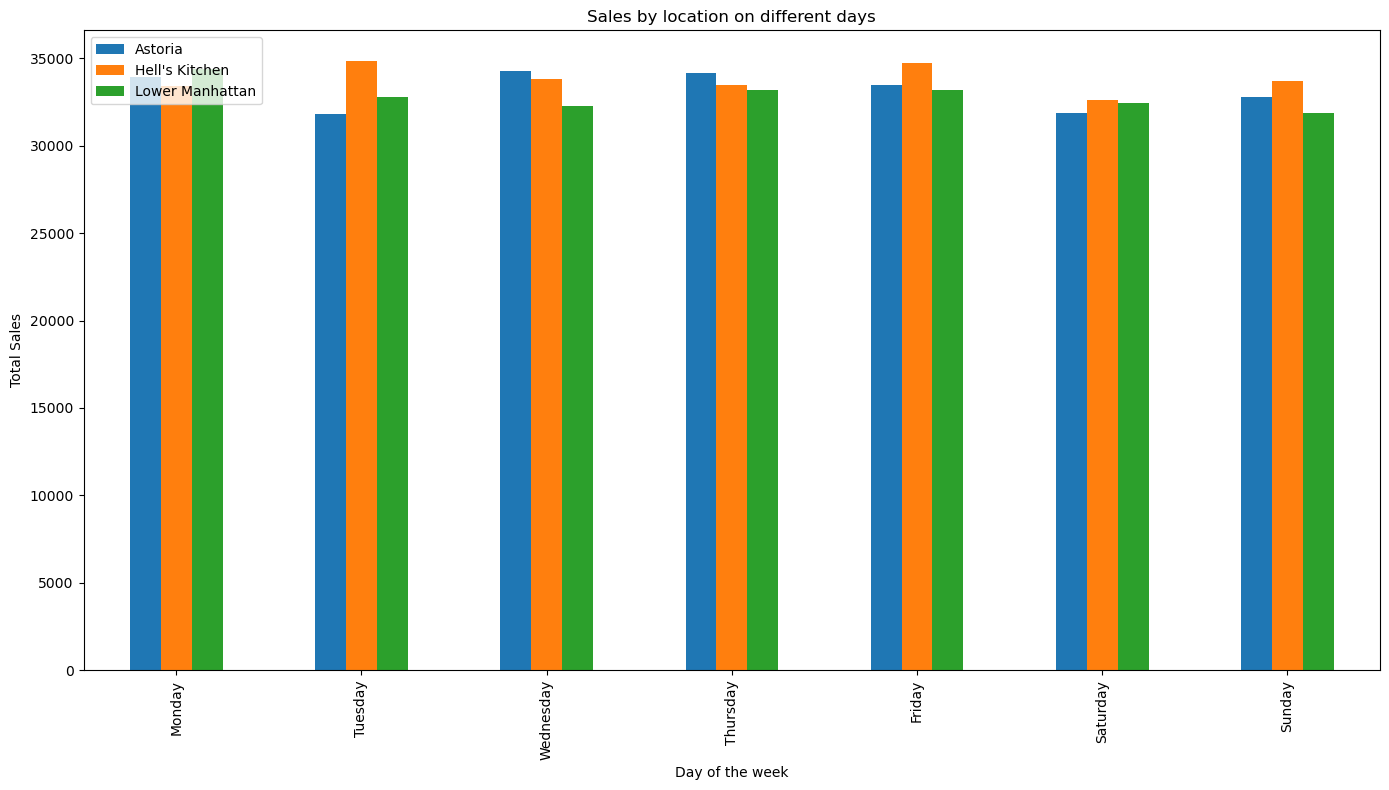

In [22]:
sales_by_day[["Astoria", "Hell's Kitchen", "Lower Manhattan"]].plot(kind = "bar", figsize = (14,8)) 

plt.xlabel('Day of the week') 
plt.ylabel('Total Sales')
plt.legend(loc = "upper left")
plt.title("Sales by location on different days")
plt.tight_layout() 
plt.show()

* Astoria performes much better on wednesday and thursday 
* Hell's Kitchen performs better on Tuesday, Friday, Saturday and Sunday
* Lower Manhattan performs better on monday

In [23]:
# sales by category  and add up all the sales while counting the transaction_id 
df_category = df.groupby('product_category').agg({
    'Sales' : 'sum',
    'transaction_id' : 'count' 
}).sort_values('Sales', ascending = False)

df_category

,Sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


In [24]:
# creating a new column called hour
df['hour'] = df['date_time'].dt.hour

hourly_sales_by_product = df.groupby(['hour', 'product_category'])['Sales'].sum().unstack() 
hourly_sales_by_product

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
hour,,,,,,,,,
6,2677.95,406.0,7811.95,874.45,2770.50,430.4,614.45,258.52,6056.05
7,7948.44,1754.0,23579.90,3602.20,6507.25,985.6,1229.05,680.18,17239.85
8,10417.84,2098.0,30579.85,5444.75,8166.00,1224.8,1403.85,605.78,22759.00
9,10523.91,2035.0,31014.85,7353.25,7787.50,1176.0,2072.15,383.82,22823.05
10,10982.50,1745.0,33297.10,7608.70,8070.50,1532.8,1608.45,799.79,23028.55
11,5612.06,532.0,18188.15,3295.20,4853.75,427.2,457.95,248.88,12703.95
12,4180.44,470.0,16162.90,1384.15,4416.50,333.6,476.50,101.60,12667.10
13,4421.08,966.0,16620.95,1566.65,4415.00,339.2,458.55,260.12,11319.90
14,4740.46,428.0,16725.35,1573.95,4637.50,356.8,471.30,238.88,12132.50


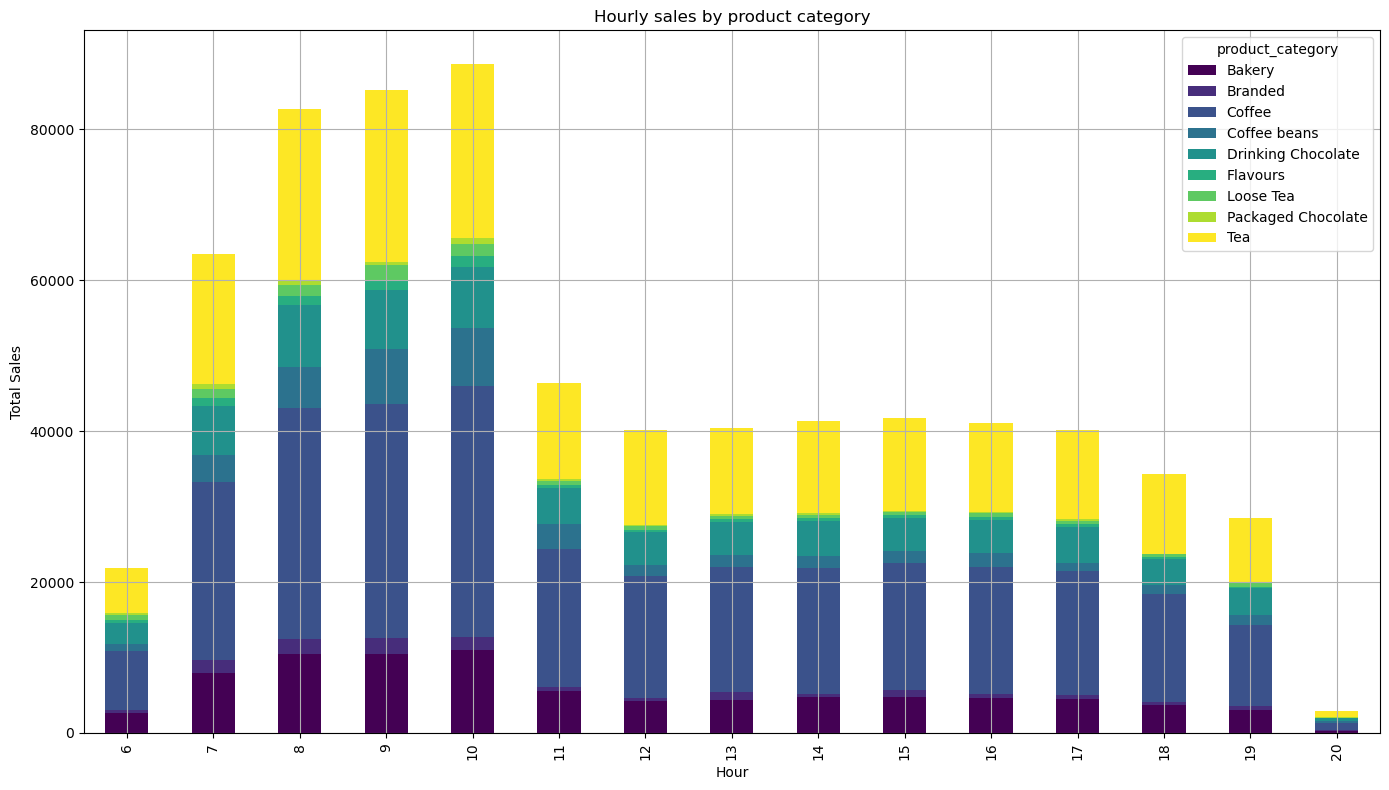

In [25]:
# stacked bar chart 
hourly_sales_by_product.plot(kind = "bar", stacked = True, figsize = (14,8), colormap = "viridis")
plt.title('Hourly sales by product category')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

* Most sales occur form 7 to 10 O'clock 
* the 20th hour records the least  amount of sales

In [26]:
# average sales by transaction 
df_category['avg_sales'] = df_category['Sales'] / df_category['transaction_id'] 
df_category

,Sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


* Coffe beans have the highest average sales
* flavours have the  least average sales

In [27]:
# sales by product type and add up all the sales while counting the transaction_id 
sales_by_product = df.groupby('product_type').agg({
    'Sales' : 'sum',
    'unit_price' : 'mean' 
}).sort_values('Sales', ascending = False)

sales_by_product

,Sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


* Barista espresso records the highes sales 
* green beans record the least amount of sales

In [28]:
# bar chart to show product sales by product  type 
product_sales_df = df.groupby(['product_category', 'product_type'])['Sales'].sum().reset_index() 
product_sales_df

,product_category,product_type,Sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


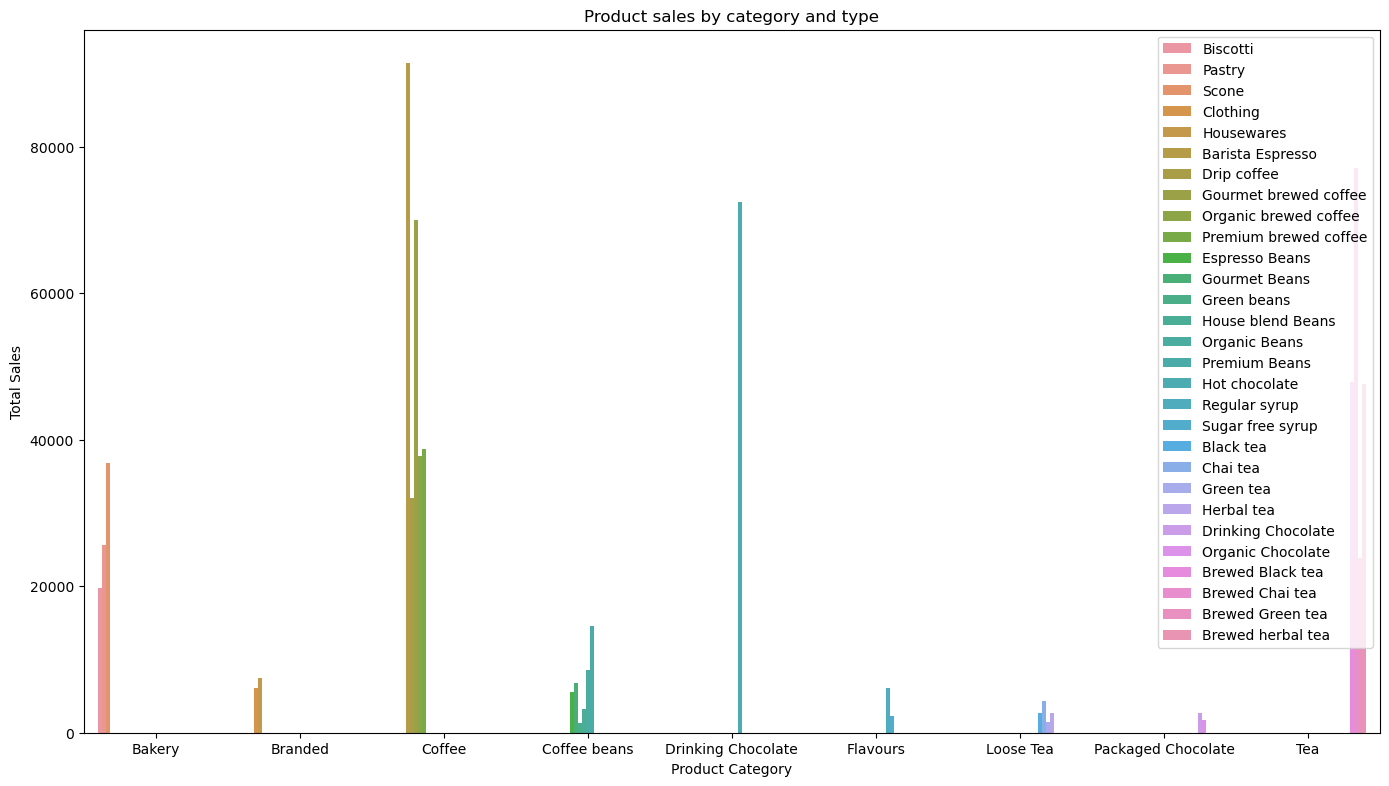

In [29]:
plt.figure(figsize=(14,8))
sns.barplot(data= product_sales_df, x = 'product_category', y = 'Sales', hue= 'product_type')
plt.title('Product sales by category and type')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.tight_layout() 
plt.legend(loc = 'upper right')
plt.show()

In [30]:
categories = product_sales_df['product_category'].unique()
categories

array(['Bakery', 'Branded', 'Coffee', 'Coffee beans',
       'Drinking Chocolate', 'Flavours', 'Loose Tea',
       'Packaged Chocolate', 'Tea'], dtype=object)

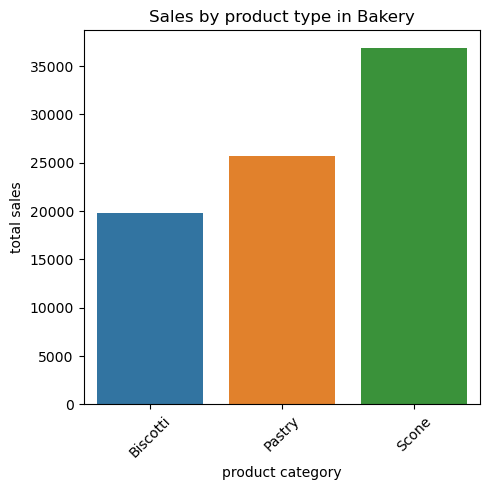

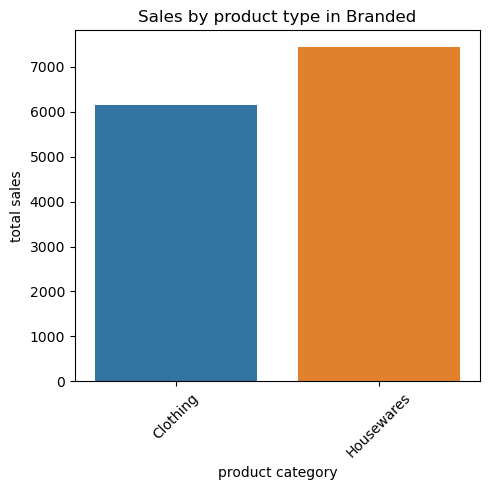

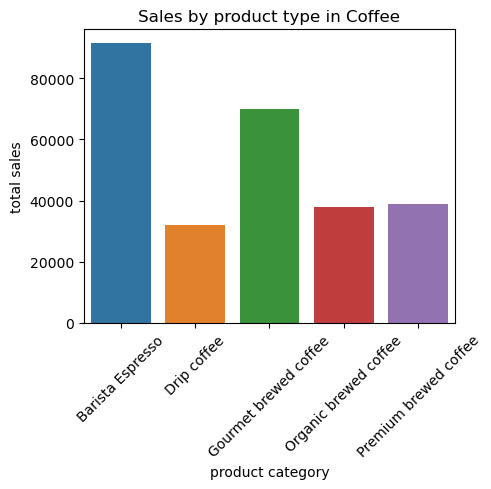

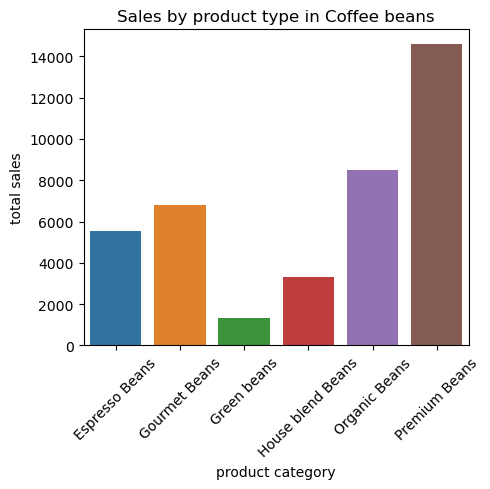

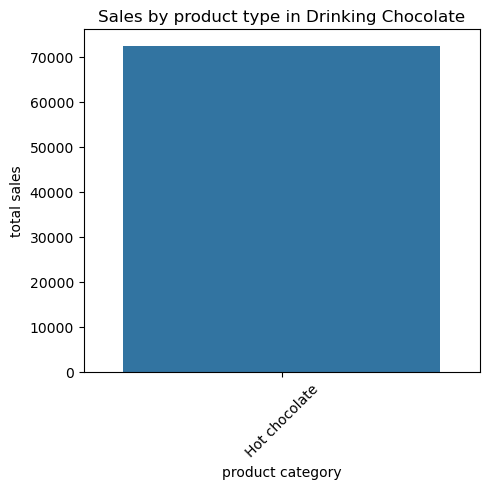

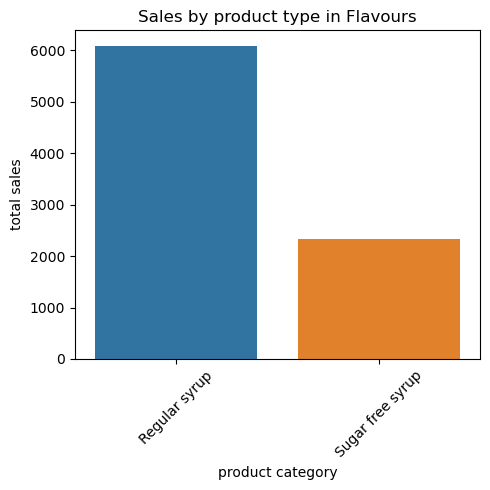

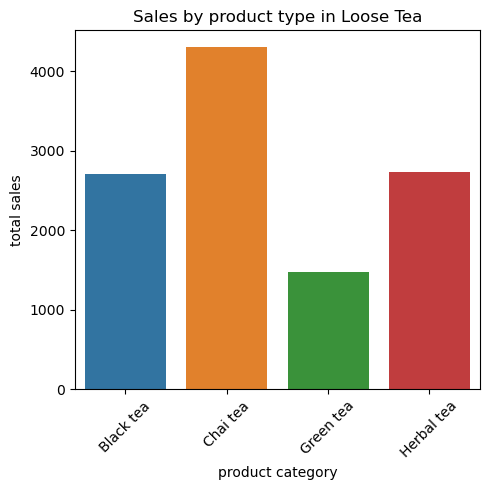

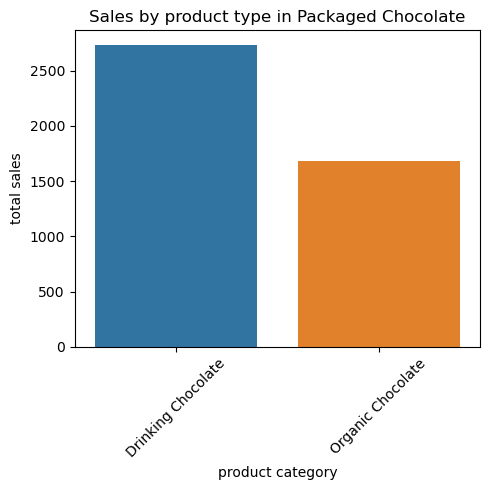

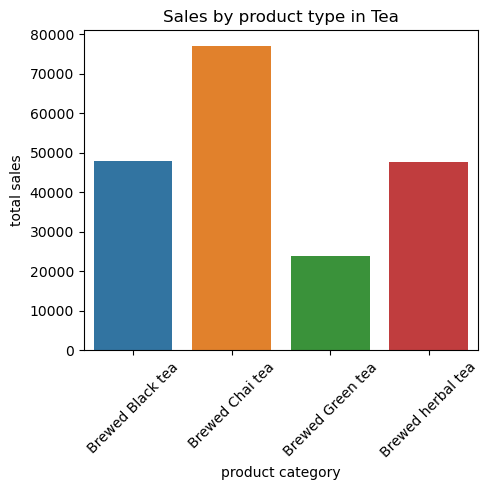

In [31]:
for category in categories: 
    plt.figure(figsize=(5,5)) 
    category_data = product_sales_df[product_sales_df['product_category'] == category] 
    sns.barplot(data=category_data, x = 'product_type', y = 'Sales') 

    plt.title(f'Sales by product type in {category}')
    plt.xlabel('product category')
    plt.ylabel('total sales')
    plt.xticks(rotation = 45) 
    plt.tight_layout() 
    plt.show()

In [32]:
# sales per hour per location 
hourly_sales_by_location = df.groupby(['store_location', 'hour'])['Sales'].sum().reset_index()
hourly_sales_by_location

,store_location,hour,Sales
0,Astoria,7,19028.80
1,Astoria,8,22805.90
2,Astoria,9,23183.57
3,Astoria,10,24426.12
4,Astoria,11,15498.13
5,Astoria,12,15681.20
6,Astoria,13,15947.87
7,Astoria,14,15175.27
8,Astoria,15,15651.95
9,Astoria,16,16110.85


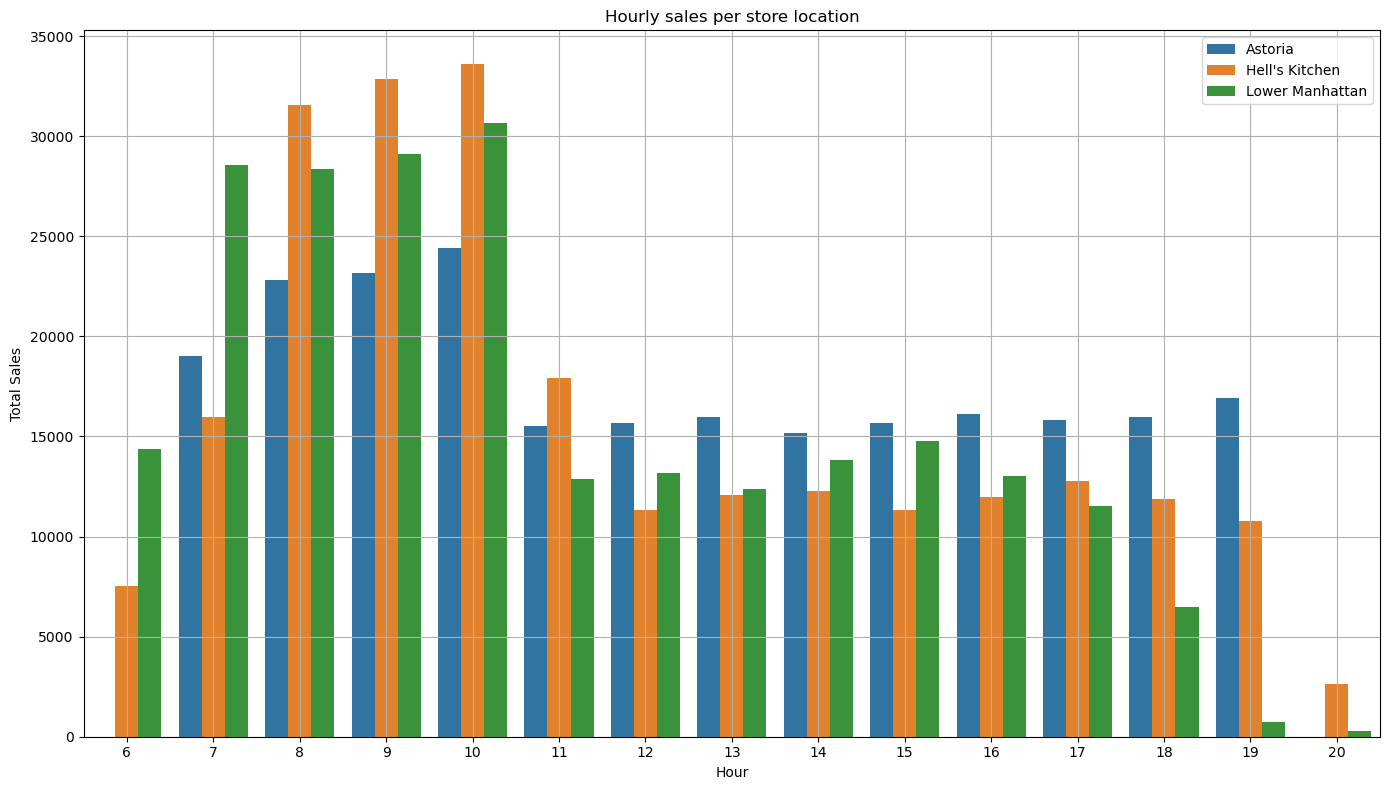

In [33]:
plt.figure(figsize=(14,8)) 
sns.barplot(data = hourly_sales_by_location, x = 'hour', y = 'Sales', hue= 'store_location')
plt.title('Hourly sales per store location')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,date_time,Sales,day_of_the_week,month,hour
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,6.0,Sunday,2023-01,7
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,6.2,Sunday,2023-01,7
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,9.0,Sunday,2023-01,7
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,2.0,Sunday,2023-01,7
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,6.2,Sunday,2023-01,7


In [36]:
df.to_csv("coffe_shop_sales.csv", index = False)